In [ ]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('covid.csv')
print(type(df))
df.head() # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [ ]:
df.shape
# num of rows = 9107
# num of cols = 10

(9107, 10)

In [ ]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [ ]:
df.dtypes.value_counts()

int64      5
object     4
float64    1
dtype: int64

#### Convtering date column to datetime datatype

In [ ]:
# Chnaging data type of date column from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date                    datetime64[ns]
day                              int64
month                            int64
year                             int64
cases                            int64
deaths                           int64
countries                       object
geoId                           object
countryterritoryCode            object
popData2018                    float64
qtr                              int64
dtype: object

In [ ]:
# Extracting the Quarter related informtaion from the date column
df['qtr'] = df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [ ]:
df['qtr'].value_counts()

1    7835
2    1205
4      67
Name: qtr, dtype: int64

In [ ]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

### Strip Plot
1) A strip plot is a graphical data anlysis technique for summarizing a univariate data set.<br>
2) Scatter chart type reprsentation using differet strips, where each strip represents a different category<br>

Syntax<br>
<b>sns.stripplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to decide the colors(used is for grouping)<br>

#### Plot a stripplot representing Cases for India, Belgium and Russia

In [ ]:
df_3c = df[df['countries'].isin(['India','Belgium','Russia'])]
df_3c.shape

(288, 11)

In [ ]:
df_3c['countries'].value_counts()

Belgium    98
India      97
Russia     93
Name: countries, dtype: int64

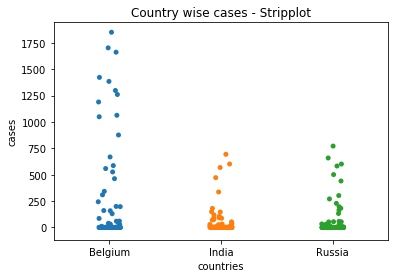

In [ ]:
sns.stripplot(data=df_3c,x='countries',y='cases')
plt.title('Country wise cases - Stripplot')
plt.show()

#### Plot a stripplot representing Cases for India, Belgium and Russia based on month. Use month as legend

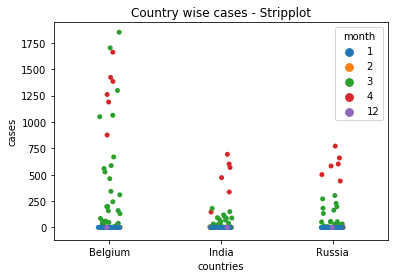

In [ ]:
sns.stripplot(data=df_3c,x='countries',y='cases',hue='month')
plt.title('Country wise cases - Stripplot')
plt.show()

### SwarmPlot
A swarm plot is a type of scatter plot that is used for representing categorical values. It is very similar to the strip plot, but it avoids the overlapping of points.

Syntax<br>
<b>sns.swarmplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to decide the colors(Used for grouping)<br>

#### Plot a swarmplot representing Cases for India, Belgium and Russia

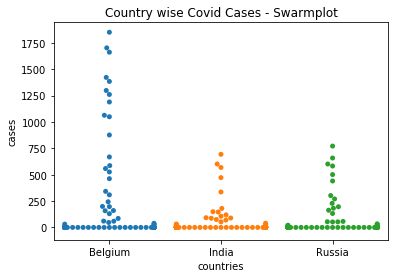

In [ ]:
sns.swarmplot(data=df_3c,x='countries',y='cases')
plt.title('Country wise Covid Cases - Swarmplot')
plt.show()

#### Plot a swarmplot representing Cases for India, Belgium and Russia based on month. Where month is used as hue parameter

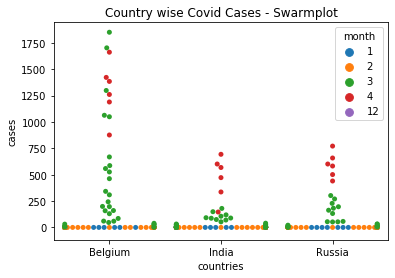

In [ ]:
sns.swarmplot(data=df_3c,x='countries',y='cases',hue='month')
plt.title('Country wise Covid Cases - Swarmplot')
plt.show()

### Displot

1) Represents the histgram (freqeuncy distribution)

Syntax<br>
<b>sns.displot(data,x,y,hue,kind)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>
kind - can be set to kde<br>

#### Plot displot for the month of Mar and Apr for India, Belgium and Russia

In [ ]:
df_3c['countries'].value_counts()

Belgium    98
India      97
Russia     93
Name: countries, dtype: int64

In [ ]:
df_3c_mar_apr = df_3c[df_3c['month'].isin([3,4])] # month is Mar or Apr
df_3c_mar_apr.shape

(105, 11)

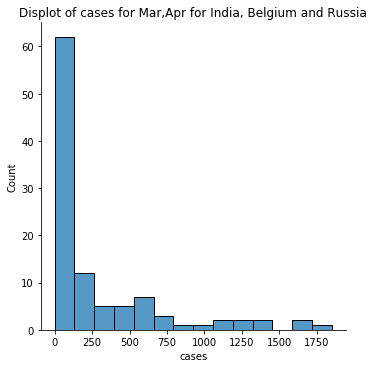

In [ ]:
sns.displot(data=df_3c_mar_apr,x='cases')
plt.title('Displot of cases for Mar,Apr for India, Belgium and Russia')
plt.show()

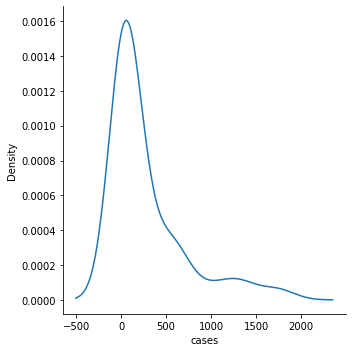

In [ ]:
sns.displot(data=df_3c_mar_apr,x='cases',kind='kde')
plt.show()

### Countplot
Show the counts of observations in each categorical bin using bars

Syntax<br>
<b>sns.countplot(data,x,y,hue)</b><br>
data - dataframe<br>
x - data to be represented on x-axis<br>
y - data to be represented on y-axis<br>
hue - column to determines the colors(used for grouping)<br>


#### Plot a countplot for month

In [ ]:
df['month'].value_counts()

3     3815
1     2077
2     1943
4     1205
12      67
Name: month, dtype: int64

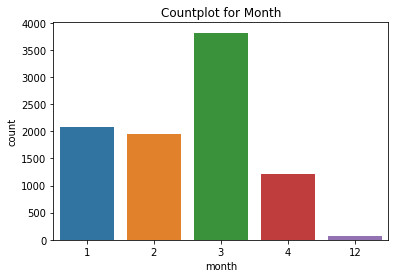

In [ ]:
sns.countplot(data=df ,x = 'month')
plt.title('Countplot for Month')
plt.show()

#### Plot a countplot for month based on countries - India, Belgium and Russia as chart legends using hue parameter

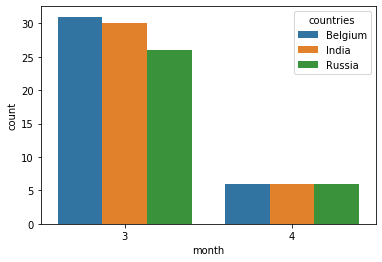

In [ ]:
sns.countplot(data=df_3c_mar_apr ,x ='month',hue='countries')
plt.show()

In [ ]:
# scatterplot
# barplot
# lineplot
# boxplot
# violinplot
# Striplot
# swarmplot
# displot
# countplot